Вам необходимо провести базовый EDA выбранного набора данных.

# Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

# Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

- данные приложений из Google Play;
- данные о видео из трендов YouTube;
- данные об уровне счастья в разных странах;
- данные по фильмам и сериалам Netflix.

In [29]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('video_games_sales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
games_df = df[['Name','Year_of_Release','Global_Sales','Platform']]
games_df

,Name,Year_of_Release,Global_Sales,Platform
0,Wii Sports,2006.0,82.53,Wii
1,Super Mario Bros.,1985.0,40.24,NES
2,Mario Kart Wii,2008.0,35.52,Wii
3,Wii Sports Resort,2009.0,32.77,Wii
4,Pokemon Red/Pokemon Blue,1996.0,31.37,GB
...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,2016.0,0.01,PS3
16715,LMA Manager 2007,2006.0,0.01,X360
16716,Haitaka no Psychedelica,2016.0,0.01,PSV
16717,Spirits & Spells,2003.0,0.01,GBA


<BarContainer object of 20 artists>

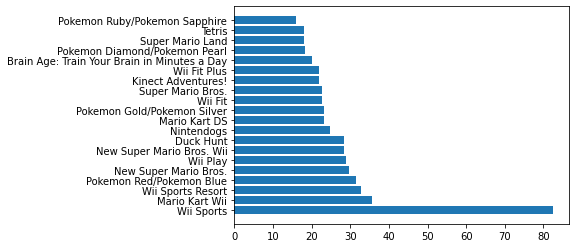

In [9]:
grouped = games_df.groupby(['Name']).mean().sort_values(by='Global_Sales',ascending=False)
grouped['Name'] = grouped.index
games_plot = grouped.head(20)
plt.barh(games_plot['Name'],games_plot['Global_Sales'])

# Вывод

Как видим по гистограмме, самая продаваемая игра - Wii Sports

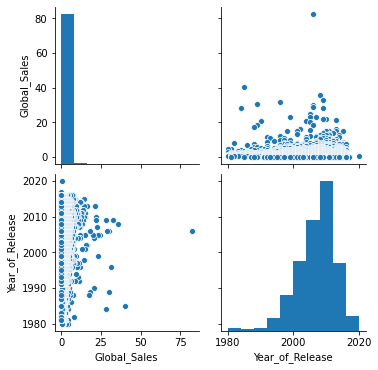

In [22]:
sb_plot = sb.pairplot(df[['Name','Global_Sales','Year_of_Release']])
sb_plot

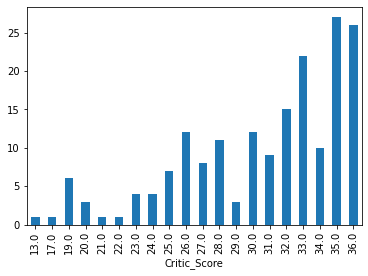

In [43]:
plot_global_sales = df.groupby('Critic_Score').size().head(20).plot(kind='bar')
plt.show()


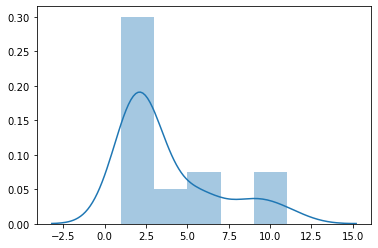

In [42]:
userscore = df.groupby('User_Score').size().head(20)
sb.distplot(userscore)